In [22]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
dataset = torchvision.datasets.MNIST('./data',
                                    transform = transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((.5,),(.5,))]))
dataloader = DataLoader(dataset, batch_size = 128, shuffle=True)

9


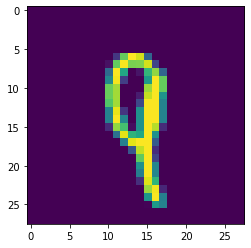

In [21]:
for data in dataloader:
    plt.imshow(data[0][0].reshape(28,28))
    print(data[1][0].item())
    break

In [28]:
d = 30
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28,d),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(d, 28*28),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [29]:
net = Autoencoder().to('cuda')
net

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=30, out_features=784, bias=True)
    (1): ReLU()
  )
)

In [30]:
loss_function = nn.MSELoss()
optim = torch.optim.Adam(net.parameters(), lr = 1e-3)

In [43]:
epochs = 20
for epoch in (l := trange(epochs)):
    for data in dataloader:
        img, _ = data
        img = img.to('cuda')
        img = img.view(img.size(0), -1)
        output = net(img)
        loss = loss_function(output, img.data)
        cat = torch.argmax(output, dim=0)
        accuracy = (cat.reshape(28*28) == img.data).float().mean()
        optim.zero_grad()
        loss.backward()
        optim.step()
    l.set_description(f'epoch [{epoch + 1}/{epochs}], loss:{loss.item():.4f},accuracy:{accuracy.item():.4f}')

epoch [20/20], loss:0.9271,accuracy:0.0000: 100%|██████████| 20/20 [08:19<00:00, 24.95s/it]


In [44]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

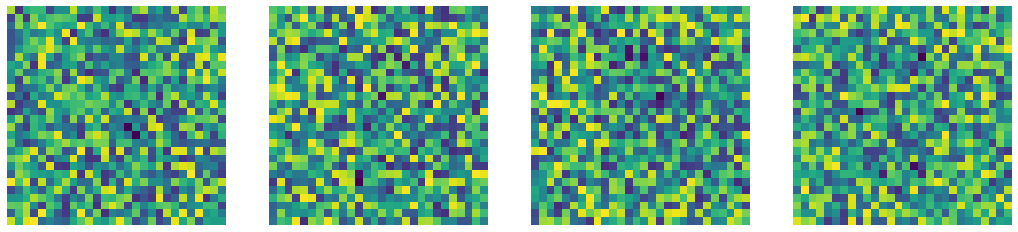

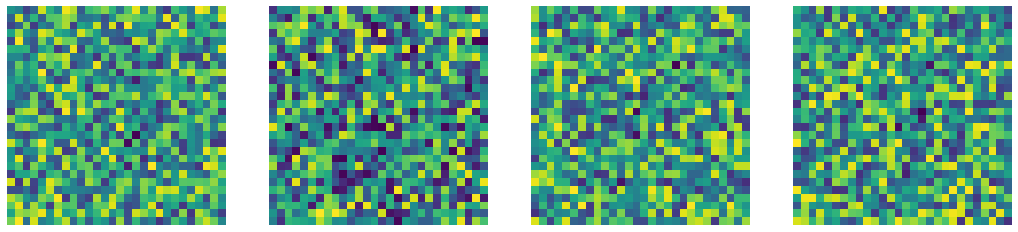

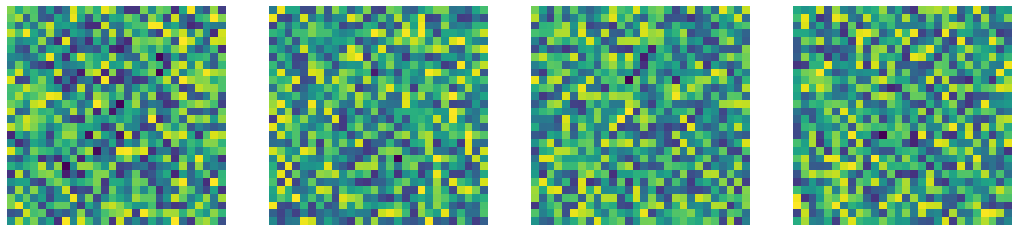

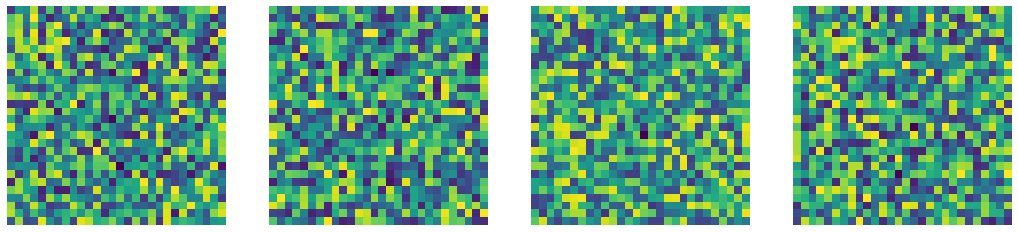

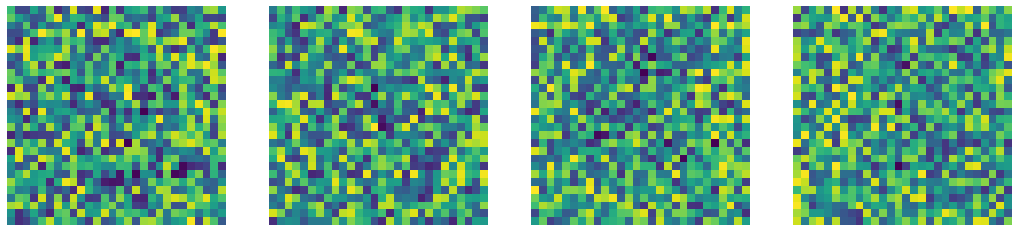

In [45]:
display_images(None, net.encoder[0].weight, 5)
